In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data=pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [3]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.6

In [4]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [6]:
X = data.drop(columns='diabetes')
y = data['diabetes']

In [7]:
X = pd.get_dummies(X, drop_first=True)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
models = {
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()
}

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
param_grid = {'n_estimators': [50, 100], 'max_depth': [10, 20]}
best_rf = GridSearchCV(models['Random Forest'], param_grid, cv=3).fit(X_train, y_train).best_estimator_

In [20]:
results = {}
for name, model in models.items():
    if name == 'Random Forest':
        model = best_rf
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cv_accuracy = cross_val_score(model, X_train, y_train, cv=3).mean()
    results[name] = {'Test Accuracy': accuracy, 'CV Accuracy': cv_accuracy}
    print(f"{name} Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))

Random Forest Confusion Matrix:
 [[18292     0]
 [  556  1152]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.67      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000

K-Nearest Neighbors Confusion Matrix:
 [[18168   124]
 [  665  1043]]
K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.89      0.61      0.73      1708

    accuracy                           0.96     20000
   macro avg       0.93      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Confusion Matrix:
 [[18259    33]
 [  518  1190]]
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.97      0.70      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.97      0.85      0.90     20000
weighted avg       0.97      0.97      0.97     20000

Logistic Regression Confusion Matrix:
 [[18127   165]
 [  654  1054]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.86      0.62      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000

Decision Tree Confusion Matrix:
 [[17791   501]
 [  442  1266]]
Decision Tree Classification Report:
               precision    recall  f1-

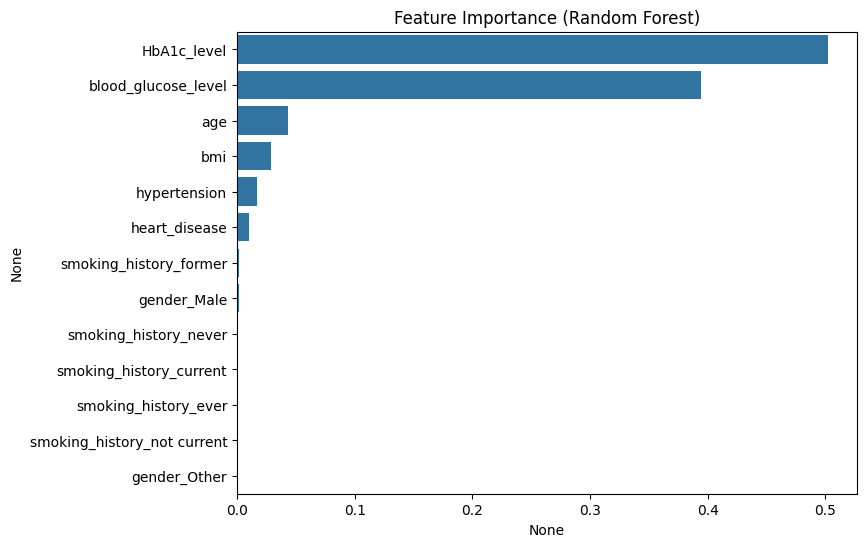

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
if 'Random Forest' in models:
    feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
    plt.figure(figsize=(8, 6))
    sns.barplot(x=feature_importances, y=feature_importances.index)
    plt.title('Feature Importance (Random Forest)')
    plt.show()

In [24]:
results_df = pd.DataFrame(results).T
print("Model Performance Summary:\n", results_df)

Model Performance Summary:
                      Test Accuracy  CV Accuracy
Random Forest              0.97220     0.971837
K-Nearest Neighbors        0.96055     0.959712
AdaBoost                   0.97245     0.971750
Logistic Regression        0.95905     0.960662
Decision Tree              0.95285     0.951638
